In [1]:
import os
import tkinter as tk
from tkinter import ttk, filedialog, messagebox, simpledialog, Listbox, Scrollbar
from PIL import Image, ImageTk  # For icons
import visualization

[NbConvertApp] Converting notebook visualization.ipynb to script
[NbConvertApp] Writing 5482 bytes to visualization.py


In [2]:
class DirectoryManager:
    def __init__(self, root):
        self.root = root
        self.root.title("🗂 Directory Manager")
        self.root.geometry("600x500")
        self.root.configure(bg="#f0f0f0")

        # Directory Selection
        self.selected_dir = tk.StringVar(value=os.getcwd())

        top_frame = ttk.Frame(root, padding=10)
        top_frame.pack(fill="x")

        ttk.Button(top_frame, text="📂 Browse", command=self.browse_directory).pack(side="left")
        ttk.Label(top_frame, textvariable=self.selected_dir, wraplength=450).pack(side="left", padx=10)

        # File List Frame
        list_frame = ttk.Frame(root, padding=10)
        list_frame.pack(fill="both", expand=True)

        self.listbox = Listbox(list_frame, width=60, height=15, font=("Arial", 12))
        self.listbox.pack(side="left", fill="both", expand=True)

        scrollbar = Scrollbar(list_frame, command=self.listbox.yview)
        scrollbar.pack(side="right", fill="y")
        self.listbox.config(yscrollcommand=scrollbar.set)

        # Buttons Frame
        btn_frame = ttk.Frame(root, padding=10)
        btn_frame.pack(fill="x")

        ttk.Button(btn_frame, text="📄 Create File", command=self.create_file).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="📁 Create Folder", command=self.create_folder).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="✏️ Rename", command=self.rename_selected).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="🗑 Delete", command=self.delete_selected).pack(side="left", padx=5)

        # Visualization Buttons
        btn_frame = ttk.Frame(root, padding=10)
        btn_frame.pack(fill="x")

        ttk.Button(btn_frame, text="📊 File Type Distribution", 
                   command=lambda: visualization.DirectoryVisualizer.visualize_file_types_static(self.selected_dir.get())).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="📈 Largest Folders", 
                   command=lambda: visualization.DirectoryVisualizer.visualize_folder_sizes_static(self.selected_dir.get())).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="📂 Largest Files", 
                   command=lambda: visualization.DirectoryVisualizer.visualize_largest_files(self.selected_dir.get())).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="📅 File Age Analysis", 
                   command=lambda: visualization.DirectoryVisualizer.visualize_file_ages_static(self.selected_dir.get())).pack(side="left", padx=5)
        ttk.Button(btn_frame, text="🔍 Find Duplicates", 
                   command=lambda: visualization.DirectoryVisualizer.detect_duplicate_files(self.selected_dir.get())).pack(side="left", padx=5)


        # Exit Button
        ttk.Button(root, text="🚪 Exit", command=self.exit_app, style="Exit.TButton").pack(pady=10)

    def browse_directory(self):
        dir_path = filedialog.askdirectory()
        if dir_path:
            self.selected_dir.set(dir_path)
            self.refresh_list()

    def refresh_list(self):
        self.listbox.delete(0, tk.END)
        path = self.selected_dir.get()
        try:
            for item in os.listdir(path):
                self.listbox.insert(tk.END, item)
        except Exception as e:
            messagebox.showerror("Error", str(e))

    def create_file(self):
        file_name = simpledialog.askstring("Create File", "Enter file name:")
        if file_name:
            file_path = os.path.join(self.selected_dir.get(), file_name)
            try:
                with open(file_path, "w") as f:
                    f.write("")  # Create an empty file
                messagebox.showinfo("Success", f"File '{file_name}' created successfully!")
            except Exception as e:
                messagebox.showerror("Error", str(e))

    def create_folder(self):
        folder_name = simpledialog.askstring("Create Folder", "Enter folder name:")
        if folder_name:
            folder_path = os.path.join(self.selected_dir.get(), folder_name)
            try:
                os.makedirs(folder_path, exist_ok=True)
                messagebox.showinfo("Success", f"Folder '{folder_name}' created successfully!")
            except Exception as e:
                messagebox.showerror("Error", str(e))
                
    def rename_selected(self):
        selected = self.listbox.curselection()
        if not selected:
            messagebox.showwarning("Warning", "No file/folder selected!")
            return
        
        old_name = self.listbox.get(selected)
        old_path = os.path.join(self.selected_dir.get(), old_name)
        new_name = simpledialog.askstring("Rename", f"Enter new name for '{old_name}':")

        if new_name:
            new_path = os.path.join(self.selected_dir.get(), new_name)
            try:
                os.rename(old_path, new_path)
                self.refresh_list()
                messagebox.showinfo("Success", f"Renamed '{old_name}' to '{new_name}'!")
            except Exception as e:
                messagebox.showerror("Error", str(e))

    def delete_selected(self):
        selected = self.listbox.curselection()
        if not selected:
            messagebox.showwarning("Warning", "No file/folder selected!")
            return
        
        item_name = self.listbox.get(selected)
        item_path = os.path.join(self.selected_dir.get(), item_name)
        confirm = messagebox.askyesno("Confirm Delete", "Are you sure you want to delete this?")
        
        if confirm:
            try:
                if os.path.isdir(item_path):
                    os.rmdir(item_path)  # Deletes empty folder
                else:
                    os.remove(item_path)  # Deletes file
                self.refresh_list()
            except Exception as e:
                messagebox.showerror("Error", str(e))

    def exit_app(self):
        confirm_exit = messagebox.askyesno("Exit", "Are you sure you want to exit?")
        if confirm_exit:
            self.root.update_idletasks()
            self.root.quit()

2025-03-27 13:32:35.971 Python[72103:4193829] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-27 13:32:35.971 Python[72103:4193829] +[IMKInputSession subclass]: chose IMKInputSession_Modern


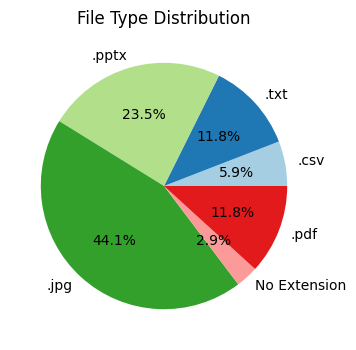

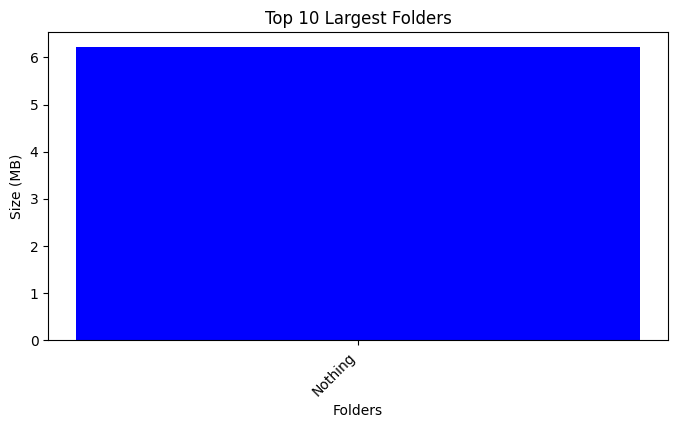

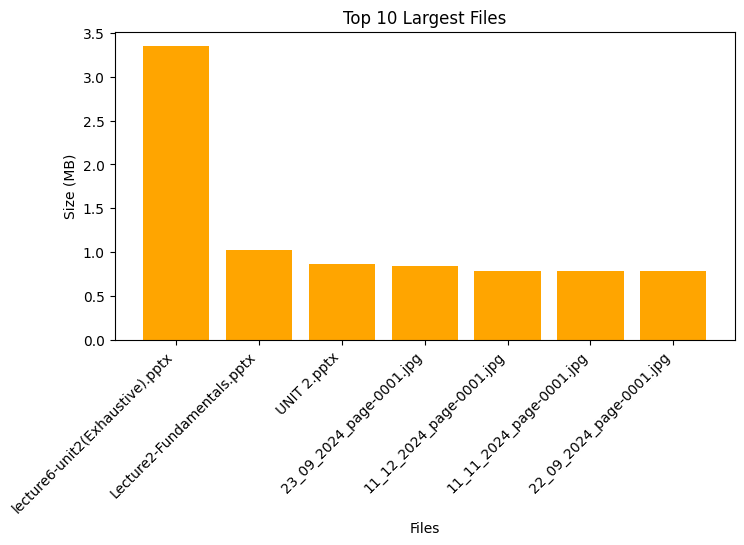

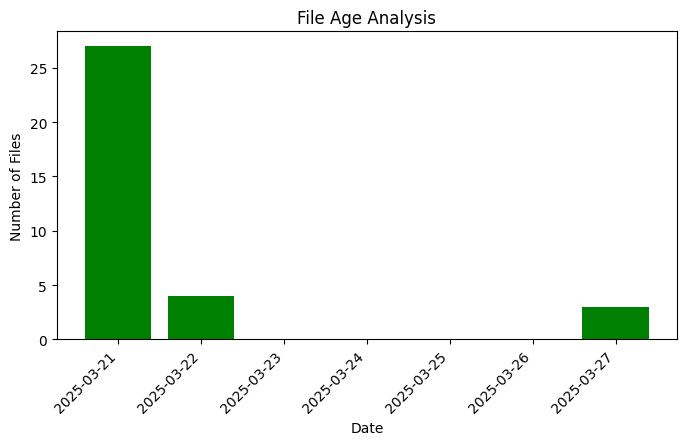


🔍 Duplicate Files Found:

Hash: e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
 - /Users/nyasavishwas/Documents/Doc/thsgh.txt
 - /Users/nyasavishwas/Documents/Doc/name.txt
 - /Users/nyasavishwas/Documents/Doc/new.txt

Hash: 9350999b46dcafce8a7c0815ce25dda2139dfd153671c938894a13efb114ae22
 - /Users/nyasavishwas/Documents/Doc/Nothing/distribution_of_raw_materials_by_direct_sale_and_agency_sales_by_sidco_2013.csv

Hash: a3bb5724c50f63d5b807470ee560e50487665f3b4ec0c34ad37284767662d64b
 - /Users/nyasavishwas/Documents/Doc/Nothing/14_11_2024_page-0001.jpg

Hash: 71fa6f5ace354dfb5d2f898bd286da3bb8eb2fa05e7c87c1e24853b172e91aee
 - /Users/nyasavishwas/Documents/Doc/Nothing/22_09_2024_page-0001.jpg

Hash: 4a17b29ceede16a935a0dd7ca0d5f1b3520eb3dbb4f004f025134fd1e086ef57
 - /Users/nyasavishwas/Documents/Doc/Nothing/A434234317_20_2025_CA KM006 Odd.pdf

Hash: 2b2af9e026f1995737066ae9a2114876fdb8d77ffe2d0695cb1793db543b8c41
 - /Users/nyasavishwas/Documents/Doc/Nothing/06_12_2024_pa

In [ ]:
# Run the Tkinter application
if __name__ == "__main__":
    root = tk.Tk()
    app = DirectoryManager(root)
    root.mainloop()